In [ ]:
pip install pydub

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten,Conv2D, MaxPooling2D, Reshape,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

### Preprocessing

In [ ]:
# Function to convert MP3 to WAV
def convert_to_wav(mp3_file_path, wav_file_path):
    audio = AudioSegment.from_mp3(mp3_file_path)
    audio.export(wav_file_path, format="wav")



In [ ]:
# Function to generate and save a spectrogram
def generate_spectrogram(wav_file_path, spectrogram_file_path):
    y, sr = librosa.load(wav_file_path)
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.savefig(spectrogram_file_path)
    plt.close()



In [ ]:
# Processing each MP3 file
def file_process(input_folder,output_folder):
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)
  for filename in os.listdir(input_folder):
      if filename.endswith(".mp3"):
          mp3_file_path = os.path.join(input_folder, filename)
          wav_file_path = os.path.join(input_folder, filename.replace('.mp3', '.wav'))
          spectrogram_file_path = os.path.join(output_folder, filename.replace('.mp3', '.png'))

          # Convert to WAV
          convert_to_wav(mp3_file_path, wav_file_path)

          # Generate and save spectrogram
          generate_spectrogram(wav_file_path, spectrogram_file_path)

          print(f"Spectrogram for {filename} saved.")

In [ ]:

human_ai = int(input("Give an Input to generate spectograms before bulding model: 1.Human 2.AI"))

Give an Input to generate spectograms before bulding model: 1.Human 2.AI2


In [ ]:
human_ai

2

In [ ]:
if human_ai == 1:
  input_folder = '/content/drive/MyDrive/normal_music'
  output_folder = '/content/drive/MyDrive/Spectrograms_normal_music'
  file_process(input_folder,output_folder)
else:
  input_folder = '/content/drive/MyDrive/ai_music'
  output_folder = '/content/drive/MyDrive/Spectrograms_ai_music'
  file_process(input_folder,output_folder)




Spectrogram for 19.mp3 saved.
Spectrogram for 8.mp3 saved.
Spectrogram for 30.mp3 saved.
Spectrogram for 20.mp3 saved.
Spectrogram for 29.mp3 saved.
Spectrogram for 28.mp3 saved.
Spectrogram for 31.mp3 saved.
Spectrogram for 17.mp3 saved.
Spectrogram for 18.mp3 saved.
Spectrogram for 9.mp3 saved.
Spectrogram for 10.mp3 saved.
Spectrogram for 32.mp3 saved.
Spectrogram for 27.mp3 saved.
Spectrogram for 7.mp3 saved.
Spectrogram for 26.mp3 saved.
Spectrogram for 25.mp3 saved.
Spectrogram for 24.mp3 saved.
Spectrogram for 23.mp3 saved.
Spectrogram for 22.mp3 saved.
Spectrogram for 21.mp3 saved.
Spectrogram for 6.mp3 saved.
Spectrogram for 16.mp3 saved.
Spectrogram for 15.mp3 saved.
Spectrogram for 1.mp3 saved.
Spectrogram for 12.mp3 saved.
Spectrogram for 11.mp3 saved.
Spectrogram for 14.mp3 saved.
Spectrogram for 4.mp3 saved.
Spectrogram for 13.mp3 saved.
Spectrogram for 2.mp3 saved.
Spectrogram for 3.mp3 saved.
Spectrogram for 5.mp3 saved.
Spectrogram for 35.mp3 saved.
Spectrogram for 33.

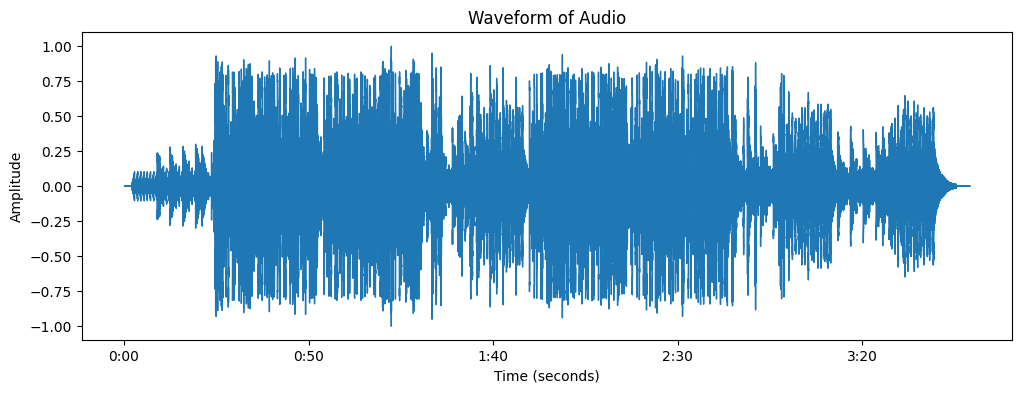

In [ ]:

# Path to the .wav file
wav_file_path = '/content/drive/MyDrive/normal_music/Tadz_20-_20Outro_20_28Progression_20Through_20Confession_29.wav'  # Replace with your actual file path

# Load the audio file
y, sr = librosa.load(wav_file_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


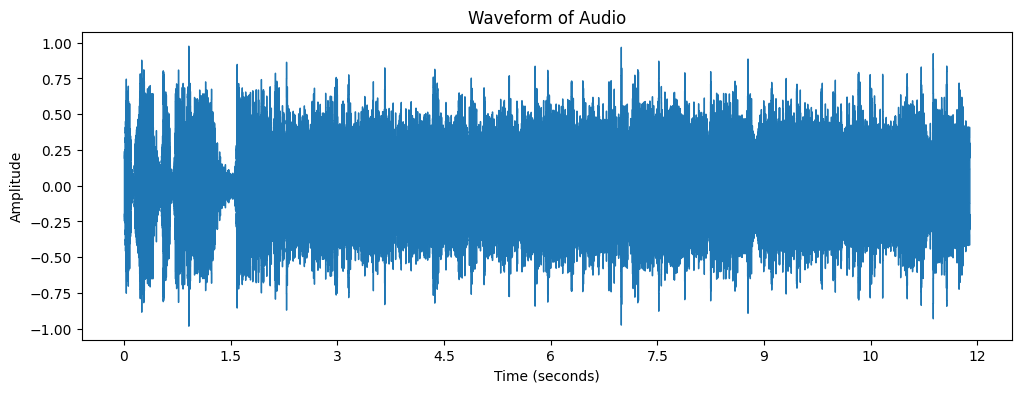

In [ ]:

# Path to the .wav file
wav_file_path = '/content/drive/MyDrive/ai_music/62.wav'  # Replace with your actual file path

# Load the audio file
y, sr = librosa.load(wav_file_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


### Spectograms generated

In [ ]:
# path to data folders
human_music_path = '/content/drive/MyDrive/Spectrograms_normal_music'
ai_music_path = '/content/drive/MyDrive/Spectrograms_ai_music'

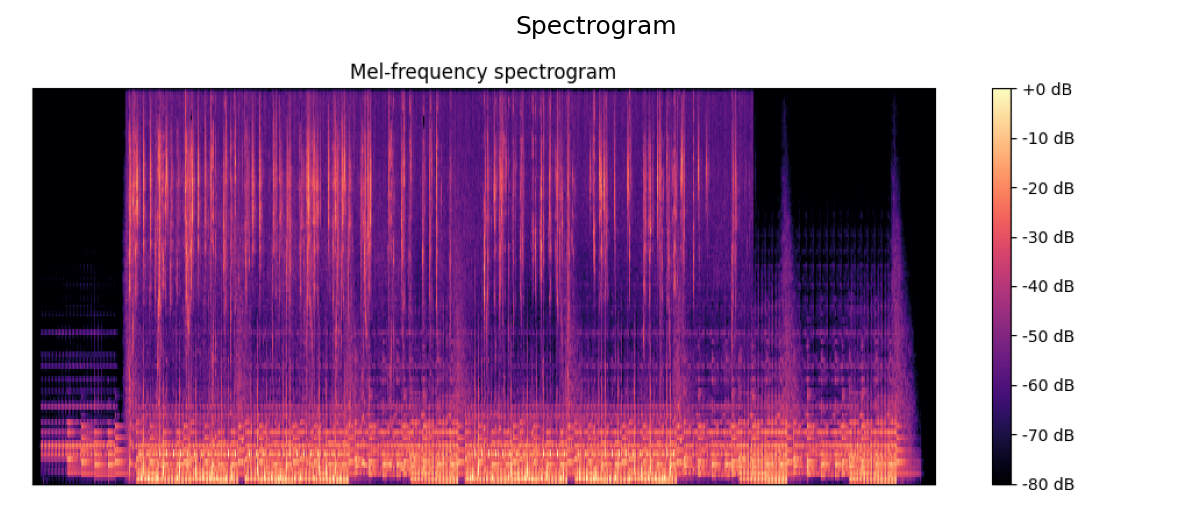

In [ ]:
# Path to the spectrogram image Normal music
spectrogram_path = '/content/drive/MyDrive/Spectrograms_normal_music/Tadz_20-_20Outro_20_28Progression_20Through_20Confession_29.png'

img = mpimg.imread(spectrogram_path)
plt.figure(figsize=(10, 6))

# Load and display the image

plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and labels
plt.title('Spectrogram')
plt.gcf().set_dpi(150)
plt.show()

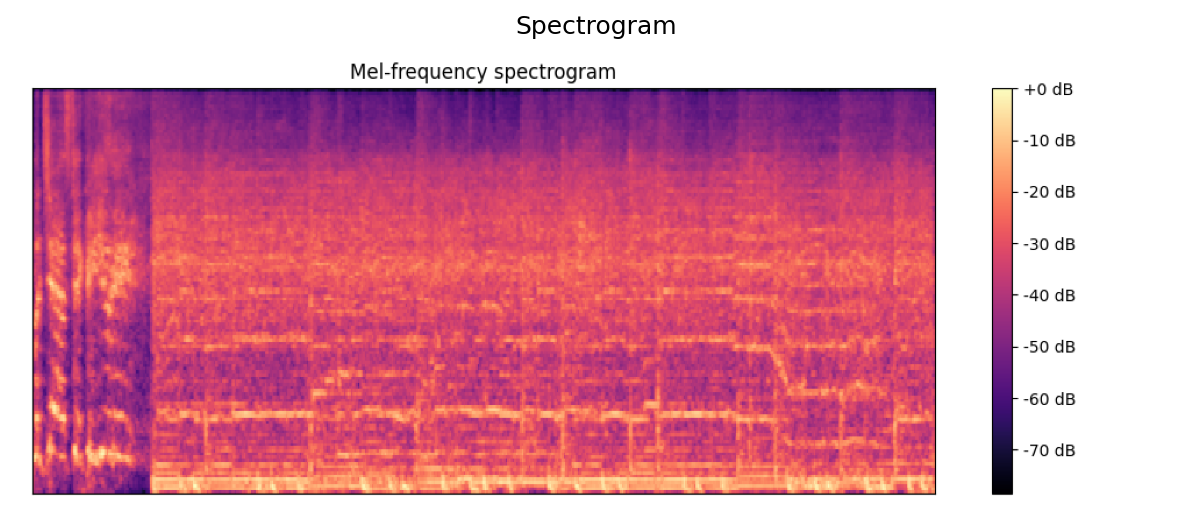

In [ ]:
# Path to the spectrogram image Normal music
spectrogram_path = '/content/drive/MyDrive/Spectrograms_ai_music/62.png'

img = mpimg.imread(spectrogram_path)
plt.figure(figsize=(10, 6))

# Load and display the image

plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and labels
plt.title('Spectrogram')
plt.gcf().set_dpi(150)
plt.show()


In [ ]:
# Load images and labels
def load_data(human_path, ai_path):
    images = []
    labels = []

    for filename in os.listdir(human_path):
        if filename.endswith('.png'):
            img = load_img(os.path.join(human_path, filename), color_mode='rgb', target_size=(128, 128))
            images.append(img_to_array(img))
            labels.append(0)  # Label for human music

    for filename in os.listdir(ai_path):
        if filename.endswith('.png'):
            img = load_img(os.path.join(ai_path, filename), color_mode='rgb', target_size=(128, 128))
            images.append(img_to_array(img))
            labels.append(1)  # Label for AI music

    return np.array(images), np.array(labels)



In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
# Set seeds for reproducibility
seed = 40
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
X, y = load_data(human_music_path, ai_music_path)
# print(y)

y = to_categorical(y, num_classes=2)
# print(y)


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)



In [ ]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# RNN model (using LSTM layers)
model = Sequential([
    # CNN layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten and reshape to fit into LSTM
    Flatten(),
    Reshape((-1, 128)),

    # LSTM layers
    LSTM(64, return_sequences=True),
    LSTM(32),

    # Output layer
    Dense(2, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 12s 2s/step - loss: 0.7719 - accuracy: 0.3750 - val_loss: 0.6886 - val_accuracy: 0.7222
Epoch 2/10
3/3 [==============================] - 3s 832ms/step - loss: 0.7207 - accuracy: 0.5139 - val_loss: 0.7591 - val_accuracy: 0.2778
Epoch 3/10
3/3 [==============================] - 3s 850ms/step - loss: 0.6932 - accuracy: 0.4861 - val_loss: 0.6964 - val_accuracy: 0.2778
Epoch 4/10
3/3 [==============================] - 3s 841ms/step - loss: 0.6930 - accuracy: 0.4028 - val_loss: 0.6715 - val_accuracy: 0.7222
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.6914 - accuracy: 0.5139 - val_loss: 0.6650 - val_accuracy: 0.7222
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.6908 - accuracy: 0.5139 - val_loss: 0.6763 - val_accuracy: 0.7222
Epoch 7/10
3/3 [==============================] - 3s 775ms/step - loss: 0.6862 - accuracy: 0.5833 - val_loss: 0.7136 - val_accuracy: 0.2778
Epoch 8/10
3/3 [============

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 215ms/step - loss: 0.6756 - accuracy: 0.7826
Test accuracy: 0.782608687877655
1/1 [==============================] - 1s 1s/step


In [ ]:
y_pred

array([[0.5000279 , 0.4999721 ],
       [0.5274096 , 0.47259033],
       [0.5168882 , 0.4831118 ],
       [0.50188965, 0.49811032],
       [0.53146255, 0.46853742],
       [0.52500224, 0.47499767],
       [0.49701777, 0.5029822 ],
       [0.49814335, 0.5018566 ],
       [0.5150876 , 0.4849124 ],
       [0.50849754, 0.4915025 ],
       [0.4957487 , 0.5042513 ],
       [0.50551003, 0.49449006],
       [0.49759477, 0.5024052 ],
       [0.49679512, 0.5032048 ],
       [0.5220456 , 0.47795454],
       [0.50756395, 0.492436  ],
       [0.49826756, 0.5017324 ],
       [0.5053351 , 0.49466494],
       [0.49286327, 0.50713676],
       [0.500707  , 0.49929303],
       [0.5079067 , 0.4920933 ],
       [0.5048333 , 0.49516666],
       [0.5331251 , 0.4668749 ]], dtype=float32)

In [ ]:
# Convert one-hot encoded y_test to class labels
y_test_classes = np.argmax(y_test, axis=1)

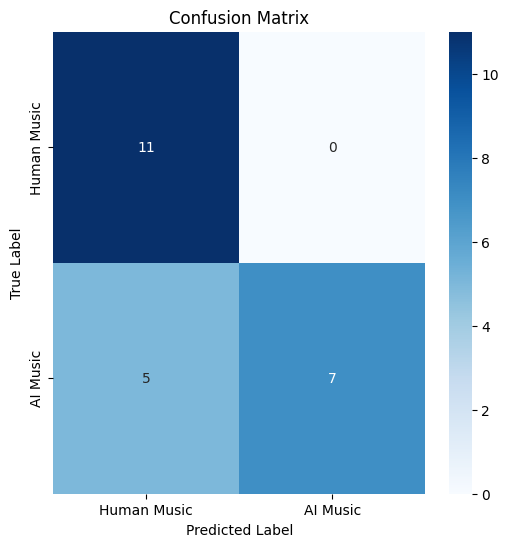

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes, classes=['Human Music', 'AI Music'])


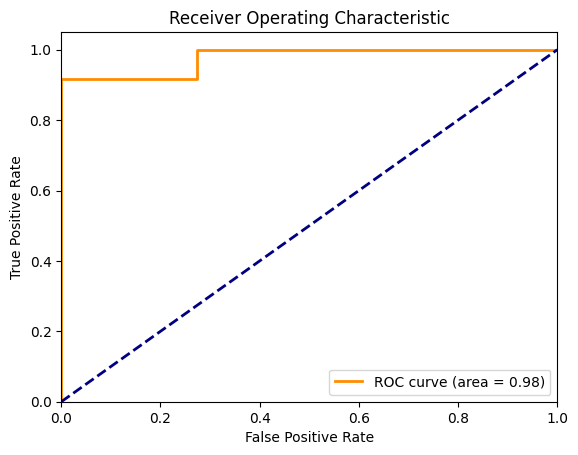

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

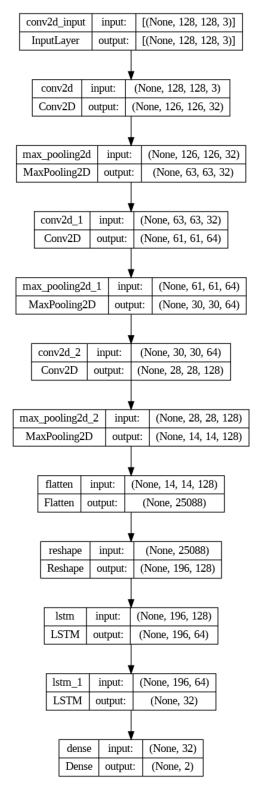

In [ ]:

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Changing the Number of Filters

In [ ]:
model1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Reshape((-1, 64)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(2, activation='softmax')
])


In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model1.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 10s 1s/step - loss: 0.7157 - accuracy: 0.4028 - val_loss: 0.6675 - val_accuracy: 0.7222
Epoch 2/10
3/3 [==============================] - 2s 479ms/step - loss: 0.7011 - accuracy: 0.5000 - val_loss: 0.7033 - val_accuracy: 0.2778
Epoch 3/10
3/3 [==============================] - 1s 478ms/step - loss: 0.6922 - accuracy: 0.4861 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 1s 430ms/step - loss: 0.6928 - accuracy: 0.4583 - val_loss: 0.6785 - val_accuracy: 0.7222
Epoch 5/10
3/3 [==============================] - 2s 489ms/step - loss: 0.6913 - accuracy: 0.5139 - val_loss: 0.6691 - val_accuracy: 0.7222
Epoch 6/10
3/3 [==============================] - 2s 479ms/step - loss: 0.6914 - accuracy: 0.5139 - val_loss: 0.6697 - val_accuracy: 0.7222
Epoch 7/10
3/3 [==============================] - 2s 482ms/step - loss: 0.6882 - accuracy: 0.5139 - val_loss: 0.6851 - val_accuracy: 0.6667
Epoch 8/10
3/3 [======

In [ ]:
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

1/1 [==============================] - 0s 130ms/step - loss: 0.6807 - accuracy: 0.4783
Test accuracy: 0.47826087474823


1/1 [==============================] - 1s 1s/step


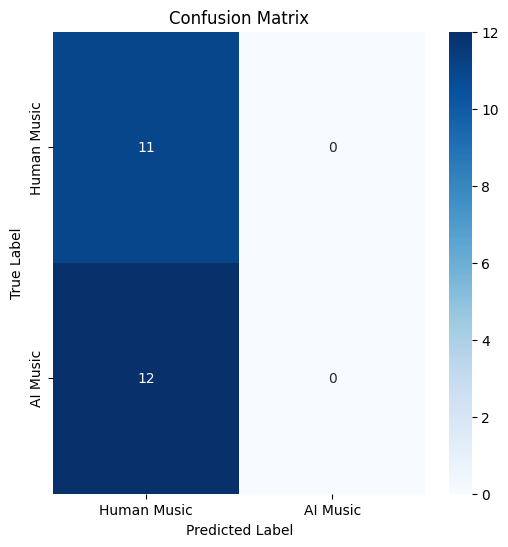

In [ ]:
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes, classes=['Human Music', 'AI Music'])


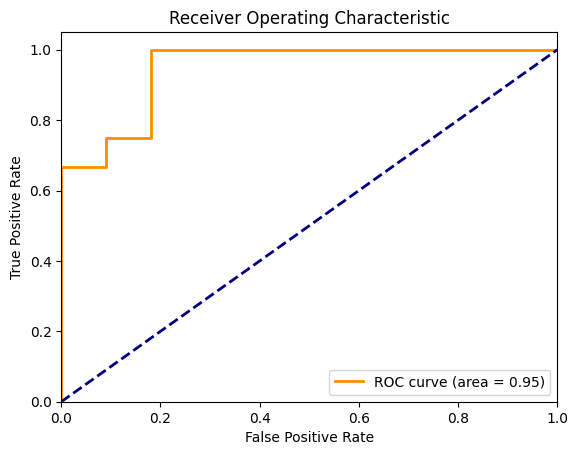

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

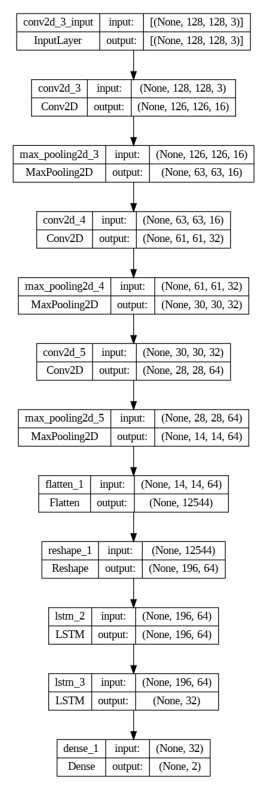

In [ ]:

plot_model(model1, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Kernal Size

In [ ]:
model2 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Reshape((-1, 64)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(2, activation='softmax')
])


In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model2.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 14s 2s/step - loss: 0.7328 - accuracy: 0.4028 - val_loss: 0.6868 - val_accuracy: 0.7222
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.7085 - accuracy: 0.4306 - val_loss: 0.7441 - val_accuracy: 0.2778
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 0.6911 - accuracy: 0.4861 - val_loss: 0.6864 - val_accuracy: 0.7222
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 0.6934 - accuracy: 0.5417 - val_loss: 0.6503 - val_accuracy: 0.7222
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 0.6938 - accuracy: 0.5139 - val_loss: 0.6410 - val_accuracy: 0.7222
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.6920 - accuracy: 0.5139 - val_loss: 0.6620 - val_accuracy: 0.7222
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.6783 - accuracy: 0.5694 - val_loss: 0.7236 - val_accuracy: 0.3333
Epoch 8/10
3/3 [========================

In [ ]:
# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

1/1 [==============================] - 0s 413ms/step - loss: 0.6695 - accuracy: 0.8261
Test accuracy: 0.8260869383811951


1/1 [==============================] - 2s 2s/step


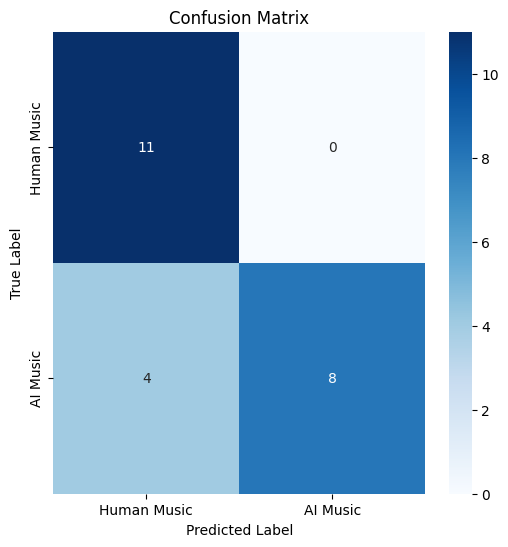

In [ ]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes, classes=['Human Music', 'AI Music'])


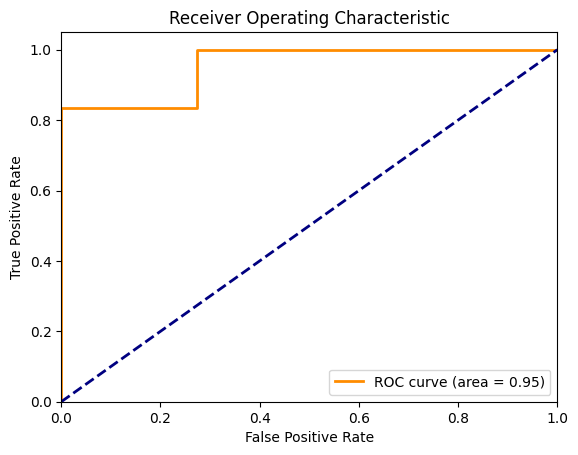

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

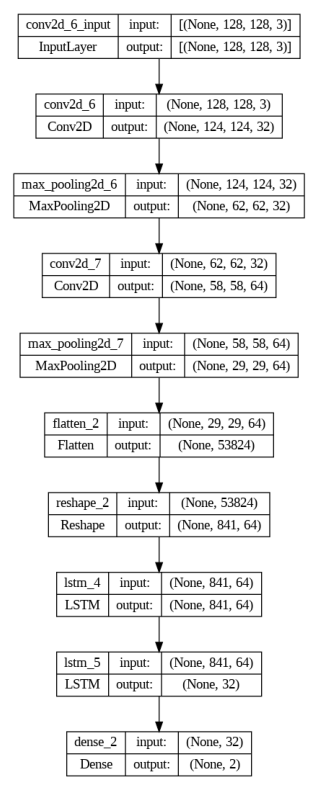

In [ ]:

plot_model(model2, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Dropout Layers

In [ ]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Reshape((-1, 64)),
    LSTM(64, return_sequences=True),
    Dropout(0.25),
    LSTM(32),
    Dense(2, activation='softmax')
])


In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the model
model3.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 11s 2s/step - loss: 0.7428 - accuracy: 0.3889 - val_loss: 0.6716 - val_accuracy: 0.7222
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 0.7001 - accuracy: 0.4167 - val_loss: 0.6892 - val_accuracy: 0.7222
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.6927 - accuracy: 0.4722 - val_loss: 0.6669 - val_accuracy: 0.7222
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.6975 - accuracy: 0.5139 - val_loss: 0.6431 - val_accuracy: 0.7222
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.6990 - accuracy: 0.5139 - val_loss: 0.6391 - val_accuracy: 0.7222
Epoch 6/10
3/3 [==============================] - 5s 1s/step - loss: 0.6936 - accuracy: 0.5139 - val_loss: 0.6588 - val_accuracy: 0.7222
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.6853 - accuracy: 0.5278 - val_loss: 0.6957 - val_accuracy: 0.3333
Epoch 8/10
3/3 [========================

In [ ]:

# Evaluate the model
loss, accuracy = model3.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

1/1 [==============================] - 0s 297ms/step - loss: 0.6919 - accuracy: 0.4783
Test accuracy: 0.47826087474823


1/1 [==============================] - 2s 2s/step


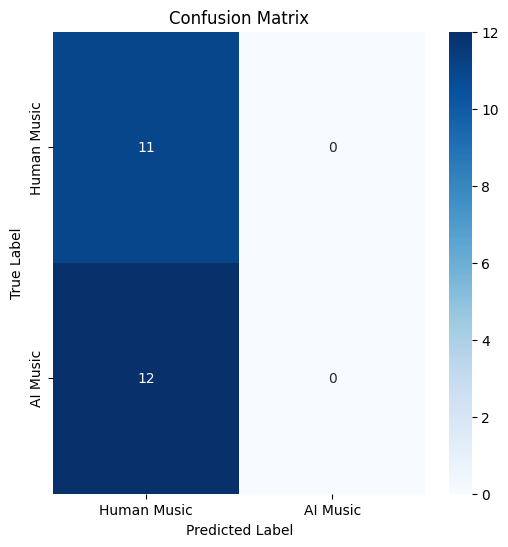

In [ ]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes, classes=['Human Music', 'AI Music'])


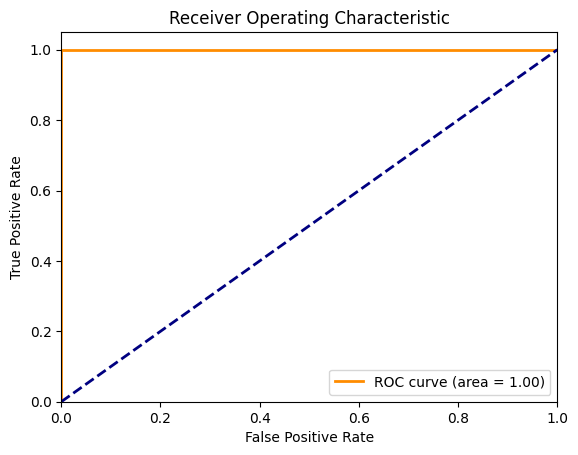

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

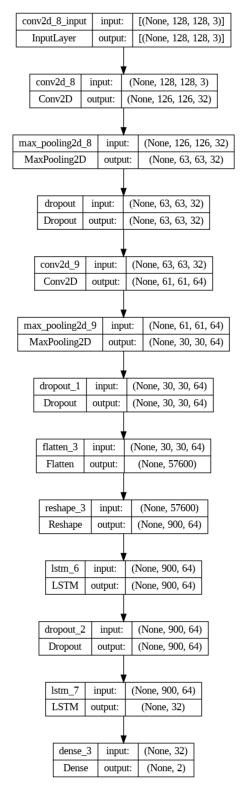

In [ ]:

plot_model(model3,to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### LSTM Units

In [ ]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Reshape((-1, 64)),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(2, activation='softmax')
])


In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model4.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 13s 2s/step - loss: 0.7634 - accuracy: 0.4028 - val_loss: 0.6789 - val_accuracy: 0.7222
Epoch 2/10
3/3 [==============================] - 9s 3s/step - loss: 0.7108 - accuracy: 0.4028 - val_loss: 0.7522 - val_accuracy: 0.2778
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.6939 - accuracy: 0.4861 - val_loss: 0.7028 - val_accuracy: 0.2778
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 0.6932 - accuracy: 0.4028 - val_loss: 0.6704 - val_accuracy: 0.7222
Epoch 5/10
3/3 [==============================] - 8s 2s/step - loss: 0.6915 - accuracy: 0.5139 - val_loss: 0.6575 - val_accuracy: 0.7222
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.6921 - accuracy: 0.5139 - val_loss: 0.6621 - val_accuracy: 0.7222
Epoch 7/10
3/3 [==============================] - 9s 2s/step - loss: 0.6876 - accuracy: 0.5139 - val_loss: 0.6811 - val_accuracy: 0.7222
Epoch 8/10
3/3 [========================

In [ ]:

# Evaluate the model
loss, accuracy = model4.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

1/1 [==============================] - 0s 483ms/step - loss: 0.6906 - accuracy: 0.4783
Test accuracy: 0.47826087474823


1/1 [==============================] - 1s 1s/step


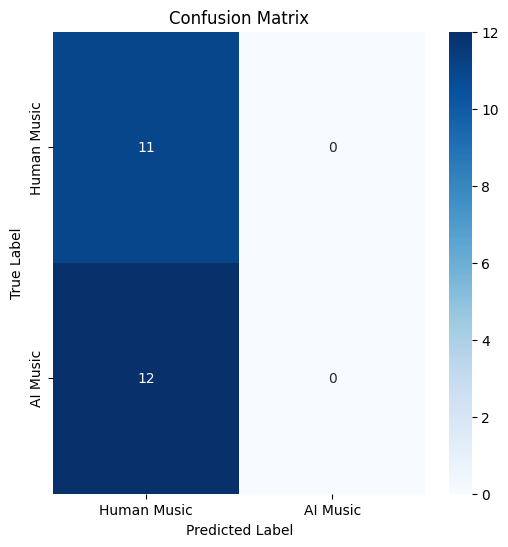

In [ ]:
y_pred = model4.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_test_classes, y_pred_classes, classes=['Human Music', 'AI Music'])



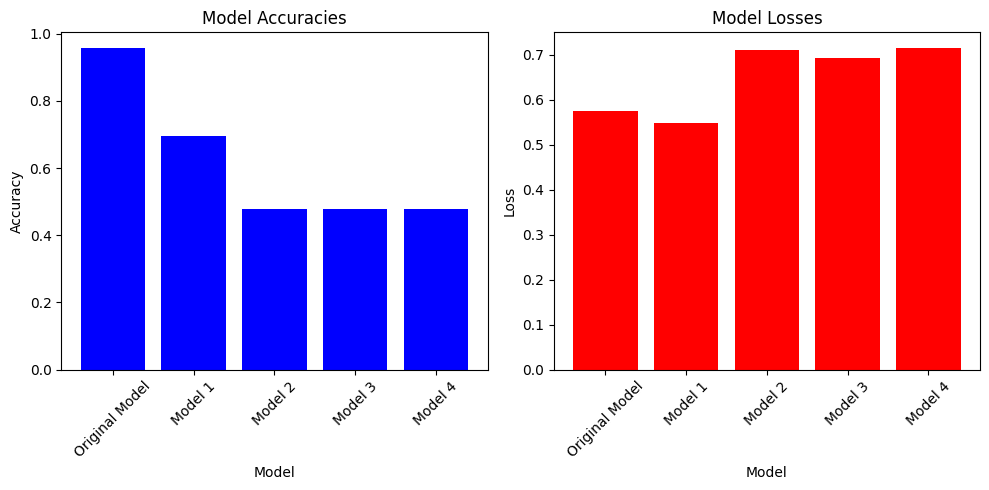

In [ ]:
import matplotlib.pyplot as plt


models = ['Original Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4']
accuracies = [0.9565, 0.6957, 0.4783, 0.4783, 0.4783]
losses = [0.5747, 0.5496, 0.7114, 0.6926, 0.7146]

# Plotting accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color='blue')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Plotting losses
plt.subplot(1, 2, 2)
plt.bar(models, losses, color='red')
plt.title('Model Losses')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


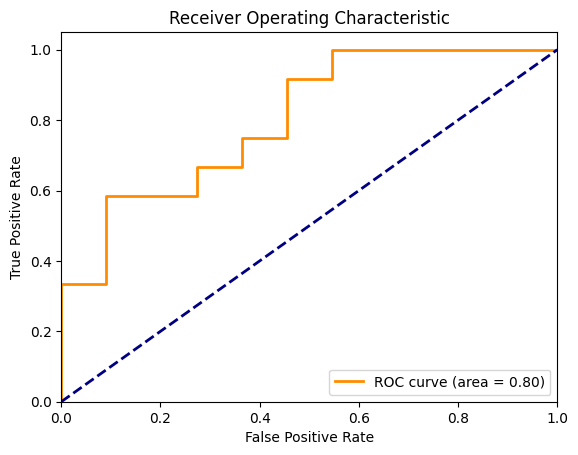

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


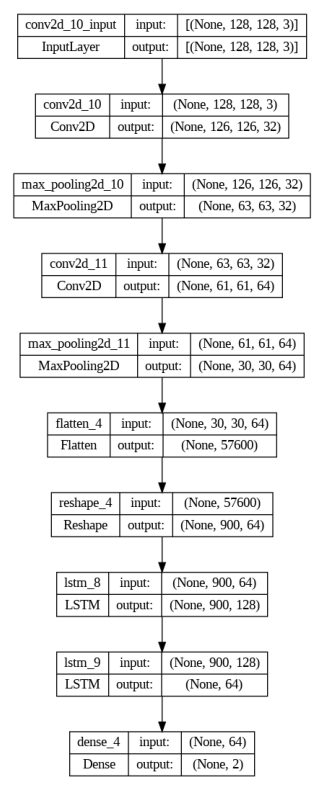

In [ ]:



plot_model(model4, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 50ms/step


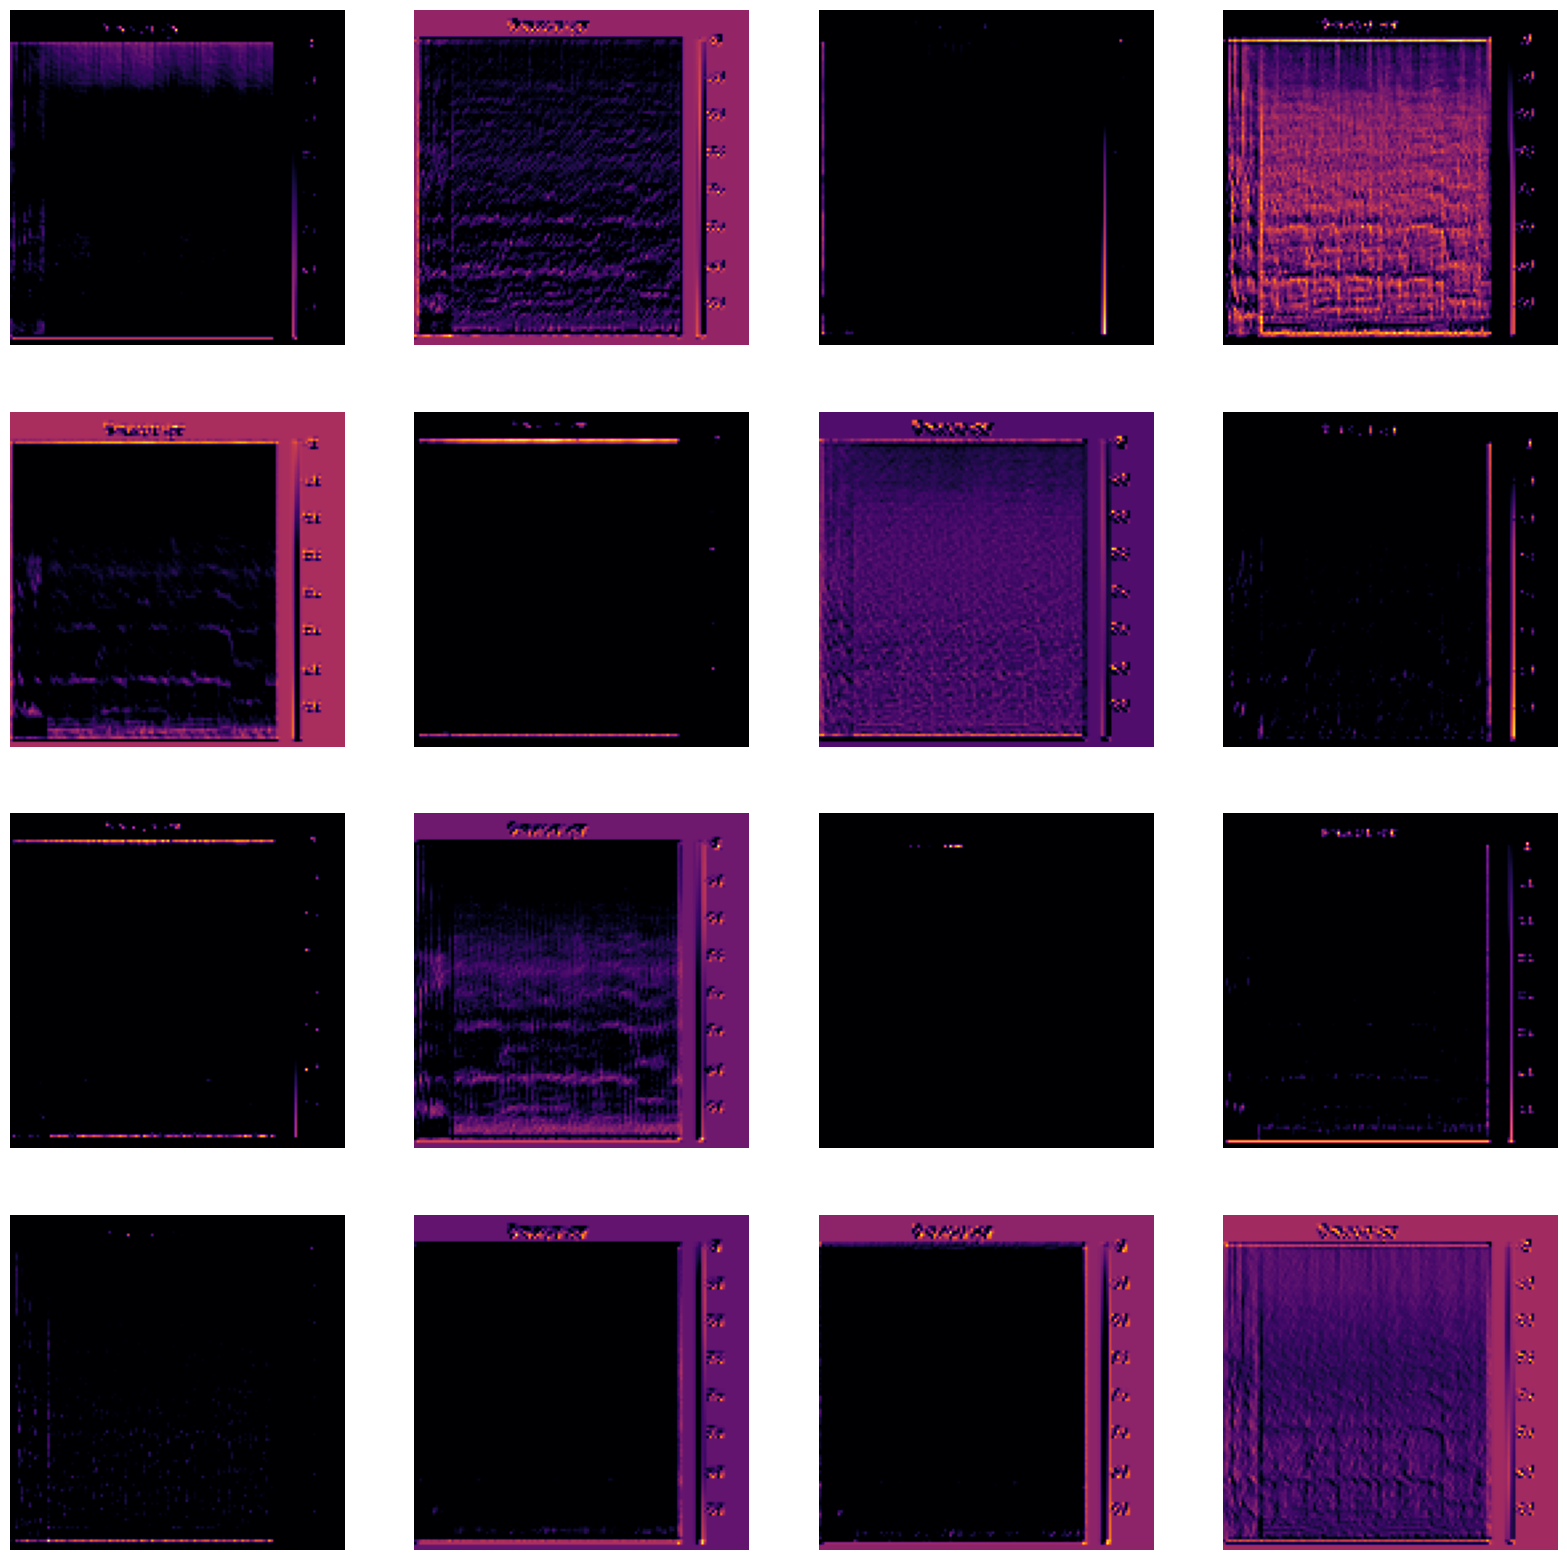

In [ ]:


def plot_feature_maps(model, layer_id, input_image, num_features=16,figsize=(20, 20), cmap='inferno'):
    # Create a model to output feature maps
    input_image = load_img(input_image, target_size=(128, 128), color_mode='rgb')  # Resize and set correct color mode
    input_image = img_to_array(input_image)
    input_image /= 255.0
    input_image = np.expand_dims(input_image, axis=0)
    feature_map_model = Model(inputs=model.inputs, outputs=model.layers[layer_id].output)

    # Get the feature map for the input image
    feature_maps = feature_map_model.predict(input_image)

    plt.figure(figsize=figsize)
    for i in range(1, num_features + 1):
        plt.subplot(num_features // 4, 4, i)
        plt.imshow(feature_maps[0, :, :, i-1], cmap=cmap)  # Using a colormap
        plt.axis('off')
    plt.show()

# Example usage (choose an appropriate layer ID and input image)
plot_feature_maps(model4, layer_id=0, input_image='/content/drive/MyDrive/Spectrograms_ai_music/62.png')

